In [1]:
import pandas as pd
import numpy  as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
# from keras.models import  Sequential
# from keras.layers import Dense, Flatten, Activation, Dropout
# from keras.layers.convolutional import Convolution2D, MaxPooling2D, Conv2D
from keras.utils import np_utils
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from pyts.image import RecurrencePlot
from pyts.image import MarkovTransitionField
from pyts.datasets import load_gunpoint
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.
C:\Users\afecn\anaconda3.1\envs\ml\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\afecn\anaconda3.1\envs\ml\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\afecn\anaconda3.1\envs\ml\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\afecn\anaconda3.1\envs\ml\lib\site-packag

In [3]:
# %%time
# %run data_generate.ipynb

In [4]:
# # %%time

# #хотим цикл чтобы все были
# #%run dg_sycle.ipynb:

# %run def_data_generate.ipynb
# all_stock = pd.DataFrame()
# for ii in ['GAZP', 'LKOH', 'SBER', 'ROSN', 'VTBR', 'GMKN']:
#     df_merg = gen_cycle(ii)
#     all_stock = all_stock.append(df_merg)

# #ПЕРЕХОДНИК
# df_merg = all_stock 
# #СОРТИРОВКА?
# df_merg.sort_values(by = 'Date', ascending=True, inplace=True)
# df_merg

In [5]:
df_merg = pd.read_csv('mer.csv', parse_dates=['Date'])
#df_merg

In [22]:
n=30
X = df_merg.iloc[:,54-n:54]

In [23]:
gasf = GramianAngularField(image_size=int(n), method='summation')
X_gasf = gasf.fit_transform(X)

In [24]:
gadf = GramianAngularField(image_size=int(n), method='difference')
X_gadf = gadf.fit_transform(X)

In [17]:
# rp = RecurrencePlot(threshold='point', percentage=30)
# X_rp = rp.fit_transform(X)

In [18]:
# %%time

# #загоняем нампи в обработку рисовальщику
# #подаем close100 ВСЕ И СРАЗУ 
# # Transform the time series into Gramian Angular Fields
# n=50
# X = df_merg.iloc[:,54-n:54]
# gasf = GramianAngularField(image_size=int(n), method='summation')
# X_gasf = gasf.fit_transform(X)
# gadf = GramianAngularField(image_size=int(n), method='difference')
# X_gadf = gadf.fit_transform(X)
# # mtf = MarkovTransitionField(image_size=int(n/5))
# # X_mtf = mtf.fit_transform(X)
# rp = RecurrencePlot(threshold='point', percentage=30)
# X_rp = rp.fit_transform(X)

display(X_gasf.shape)
display(X_gadf.shape)
#display(X_mtf.shape)
# display(X_rp.shape)

(114393, 10, 10)

(114393, 10, 10)

(114393, 10, 10)

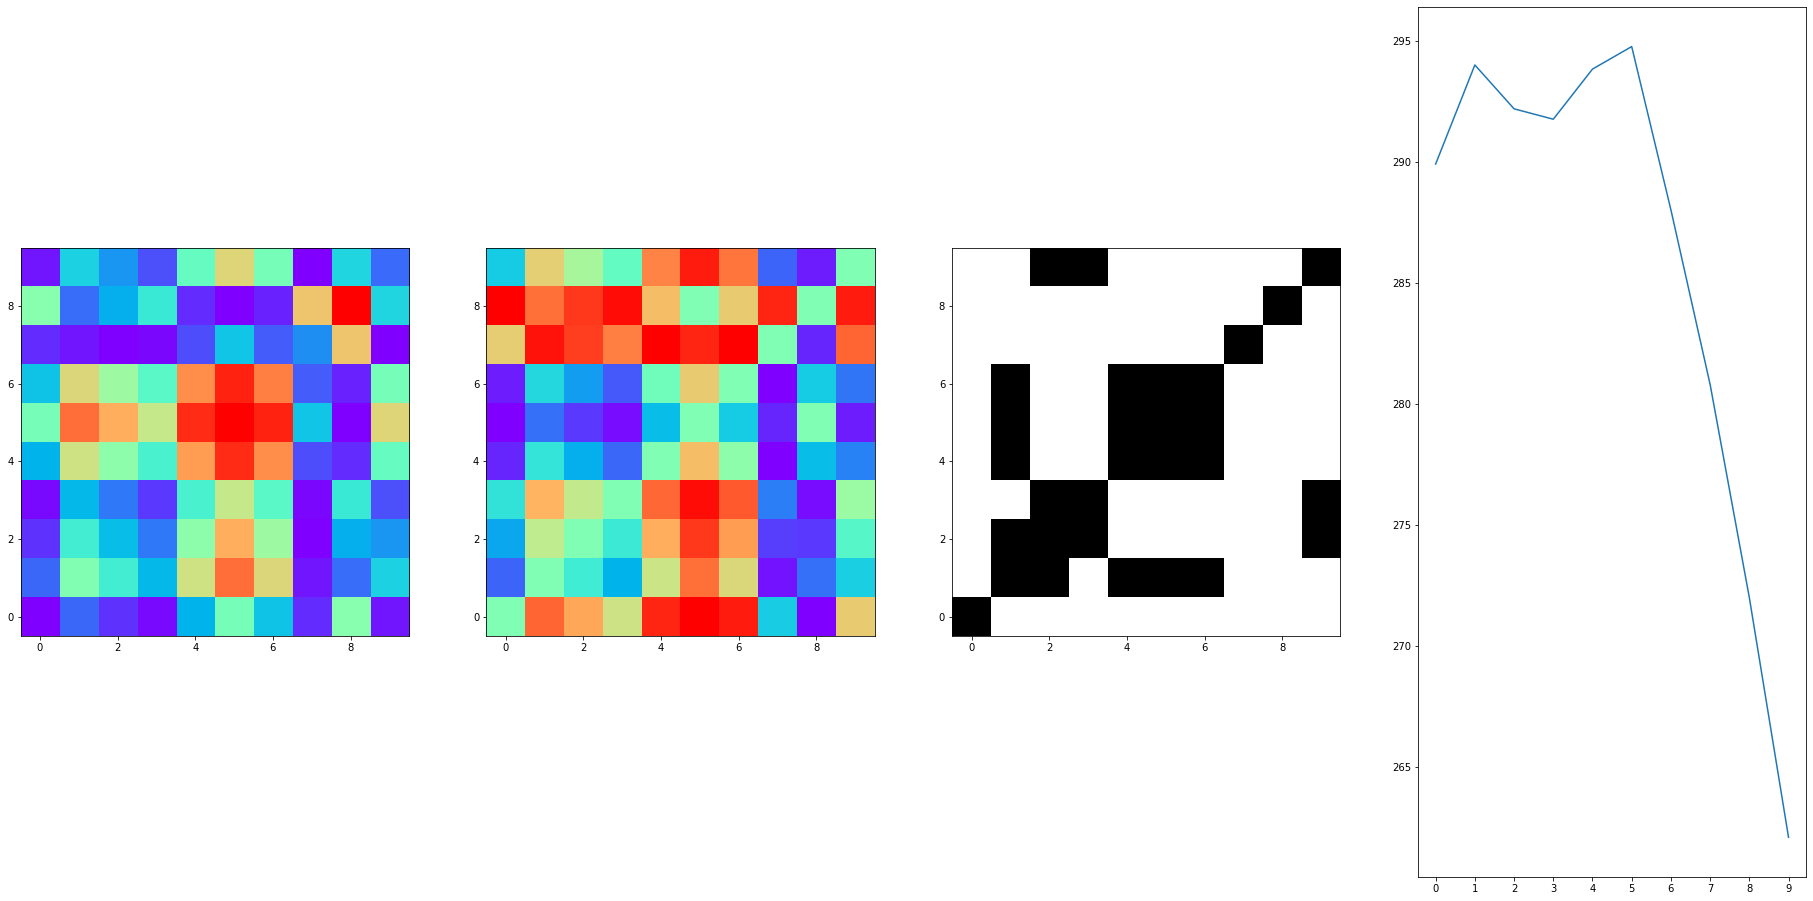

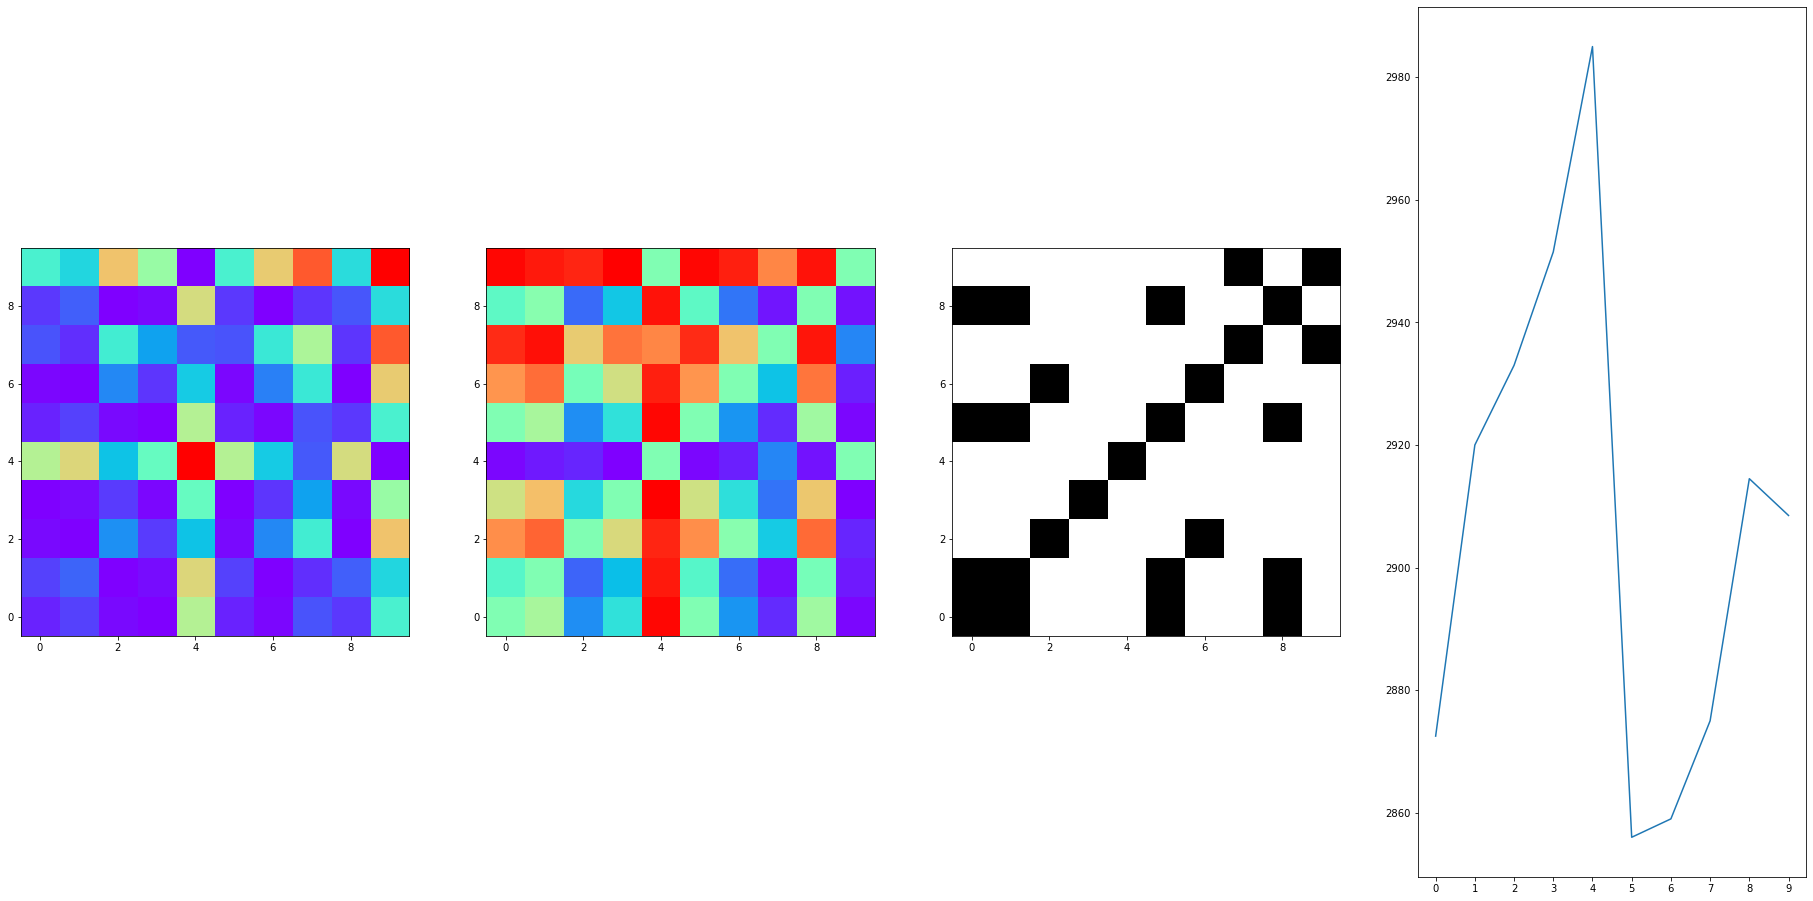

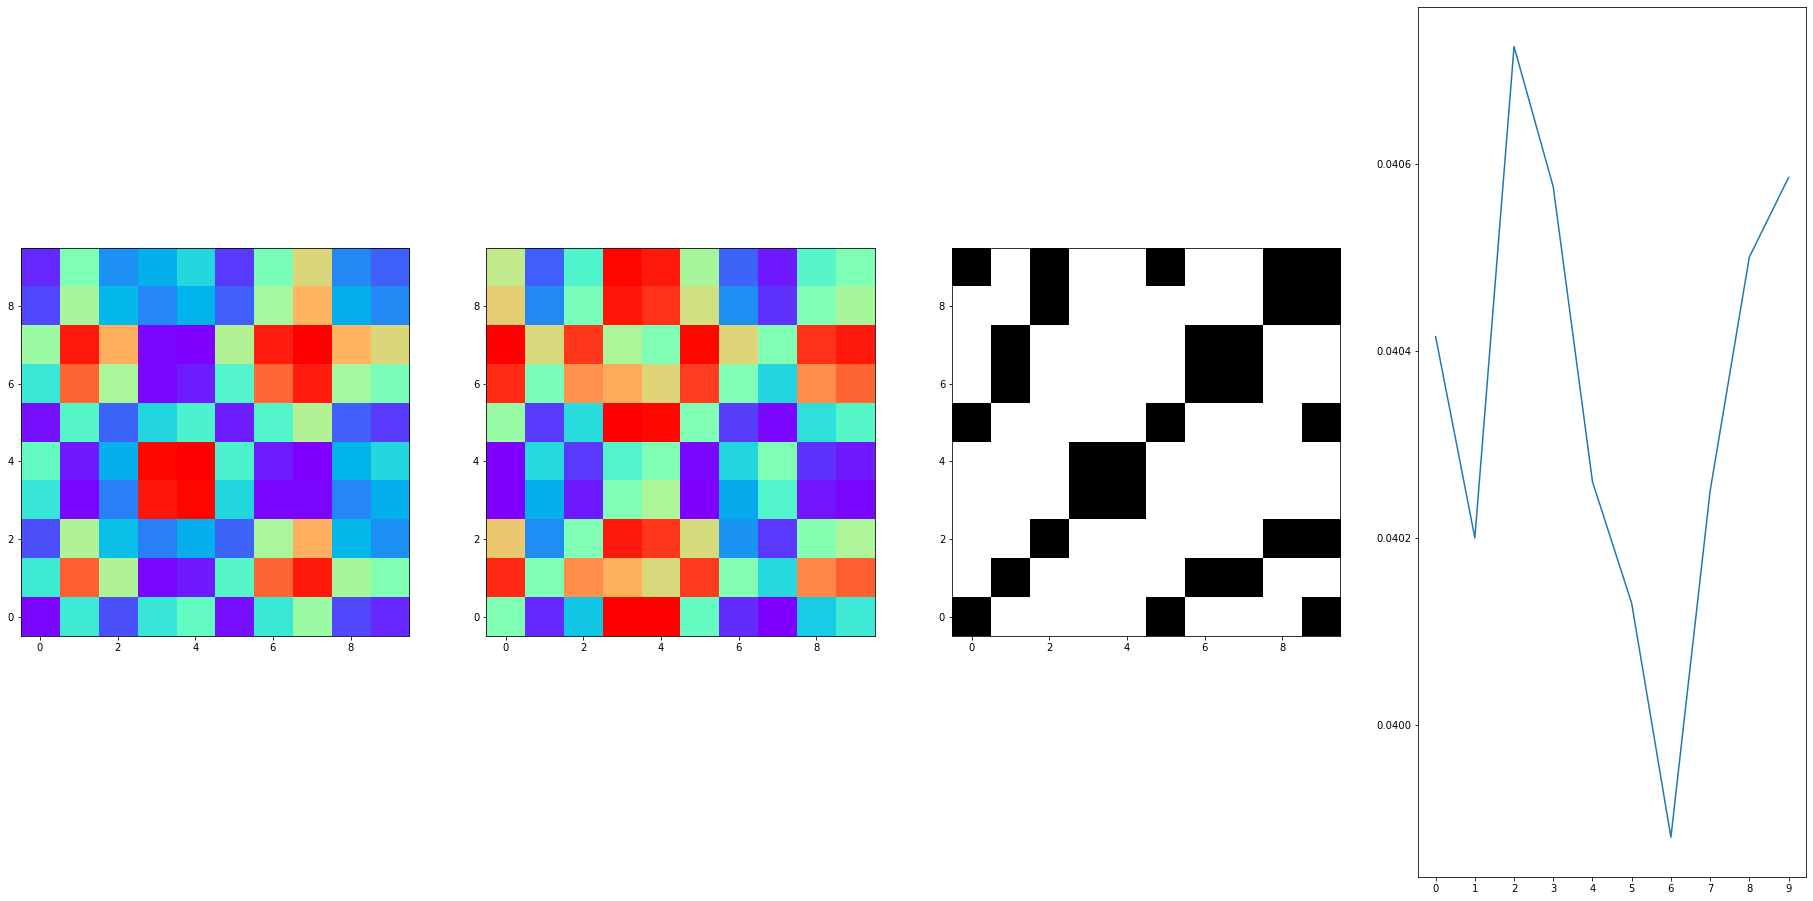

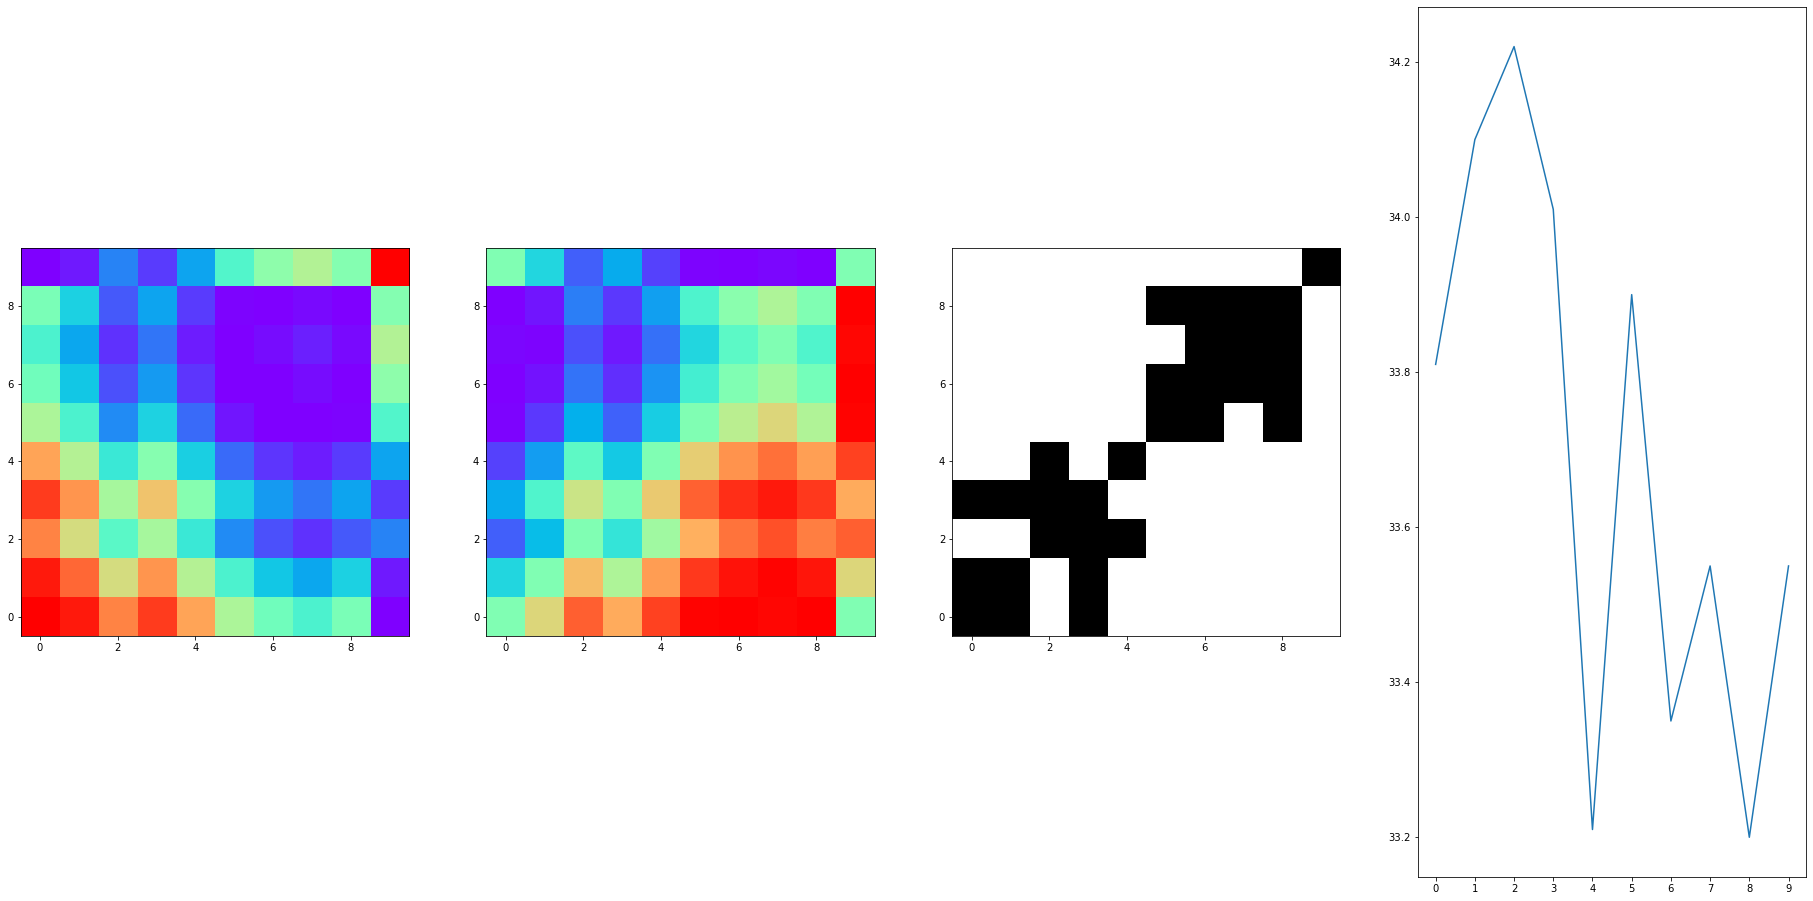

In [19]:
# #Show the images for the first time series ПОРИСУЕМ ИЗ X_gasf

# for i in range(0,40000,10000):
#     fig, axes = plt.subplots(ncols=4, figsize = (32,16))
#     axes[0].imshow(X_gasf[i], cmap='rainbow', origin='lower')
#     axes[1].imshow(X_gadf[i], cmap='rainbow', origin='lower')
#     axes[2].imshow(X_rp[i],   cmap='binary',  origin='lower')
#     axes[3].plot(df_merg.iloc[i,4:n+4])
# #    axes[4].plot(close100_n[i])
#     plt.show()

In [20]:
# aaa=        '([X_gadf.T, X_gasf.T, X_rp.T]).T'
# xx = np.array([X_gadf.T, X_gasf.T, X_rp.T]).T
aaa=        '([X_gadf.T, X_gasf.T]).T'
xx = np.array([X_gadf.T, X_gasf.T]).T
xx.shape

(114393, 10, 10, 2)

In [21]:
xx.shape

(114393, 10, 10, 2)

In [61]:
#проверочка

#(X_rp - xx[:,:,:,2]).sum()

In [12]:
labels = ['con_div_MACD', 'cross_SMA_25', 'BB']
for i in labels:
    display(i)
    display(np.unique(np.array(df_merg[i]), return_counts=True))

'con_div_MACD'

(array([-1,  0,  1], dtype=int64), array([15160, 84441, 14792], dtype=int64))

'cross_SMA_25'

(array([-1,  0,  1], dtype=int64),
 array([  5743, 102896,   5754], dtype=int64))

'BB'

(array([-1,  0,  1], dtype=int64), array([10300, 93246, 10847], dtype=int64))

In [13]:
#какой лейбл хотим?
label = labels[1]
label
#or
# df_merg['label_2'] = np.where(df_merg['return']>0.5,1, np.where(df_merg['return']<-0.5,-1,0))
# label = 'label_2'
# display(np.unique(df_merg['label_2'], return_counts=True))

'BB'

In [14]:
#reshape ato crying
#X_gadf = np.reshape(X_gadf, (len(X_gadf),16,16,1))


#границы
tr_n = int(len(X)*0.75)
te_n = int(len(X)*0.85)

X_train, Y_train, X_test, Y_test, X_cv, Y_cv = xx[0:tr_n],        df_merg[label].iloc[0:tr_n], \
                                               xx[te_n:],         df_merg[label].iloc[te_n:],\
                                               xx[tr_n:te_n],     df_merg[label].iloc[tr_n:te_n]

Pr_train, Pr_test, Pr_cv = df_merg[label].iloc[0:tr_n],df_merg[label].iloc[te_n:],df_merg[label].iloc[tr_n:te_n]

display(X_train.shape)
display(Y_train.shape)
display(X_test.shape)
display(Y_test.shape)
display(X_cv.shape)
display(Y_cv.shape)
display(Pr_train.shape)
display(Pr_test.shape)
display(Pr_cv.shape)

(85794, 30, 30, 2)

(85794,)

(17159, 30, 30, 2)

(17159,)

(11440, 30, 30, 2)

(11440,)

(85794,)

(17159,)

(11440,)

In [58]:
#Notmalization
# X_train = X_train.astype('float32')
# X_test  = X_test. astype('float32')
# X_cv  = X_cv. astype('float32')
# X_train /= 255
# X_test  /= 255
# X_cv    /= 255

In [15]:
#Kategory
Y_train = np_utils.to_categorical(Y_train,3)
Y_test  = np_utils.to_categorical(Y_test,3)
Y_cv  =   np_utils.to_categorical(Y_cv,3)

In [16]:
display('X_train, Y_train, X_test, Y_test, X_cv, Y_cv, Pr_train, Pr_test, Pr_cv')
display(label)

'X_train, Y_train, X_test, Y_test, X_cv, Y_cv, Pr_train, Pr_test, Pr_cv'

'BB'